# Least-Squares Fitting - Examples

## A regression exercise

Let's assume we have a collection of *N* independent measurements $(x_i,y_i)$


In [1]:
import numpy as np
x = np.array([1,2,3,4,5,6])
y = np.array([0.8,1.3,1.9,2.5,3.1,3.7])
sy= 0.1*np.ones(len(y))

They can be visualised as follows

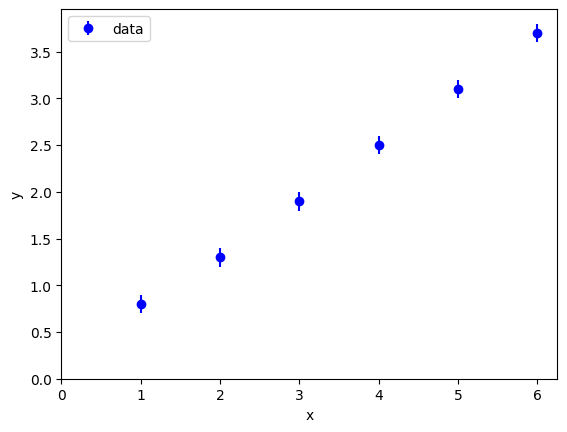

In [2]:
from matplotlib import pyplot as plt
plt.errorbar(x,y,sy,fmt='bo',label='data')
# draw origin of the axes
plt.xlim(left=0)
plt.ylim(bottom=0)
# axes labels
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Let's now fit the data! We'll use [`iminuit`](https://iminuit.readthedocs.io/en/stable/index.html).
First we load the `Minuit` object that performs the minimisation.
Then we load the function template that creates a *cost* function corresponding to the least squares method.

In [4]:
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit
# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

Now we can define our model (a line)

In [5]:
def line(x,m,q):
    return m*x + q

We can evaluate the *cost* function to be minimised using the `LeastSquares` function defined before

In [6]:
least_squares = LeastSquares(x, y, sy, line)

and run the minimisation program `Minuit` to find the parameters that correspond to the minimum of the cost function

In [7]:
m = Minuit(least_squares, m=0, q=0)  # starting values for m and q

m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4762 (χ²/ndof = 0.1)     │              Nfcn = 42               │
│ EDM = 2.82e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   0.586   │   0.024   │            │            │         │         │       │
│ 1 │ q    │   0.17    │   0.09    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        m        q │
├───┼───────────────────┤
│ m │ 0.000571  -2.0e-3 │
│ q │  -2.0e-3  0.00867 │
└───┴───────────────────┘

The minimum $\chi^2$ information can be accessed by
- value: `m.fval`
- number of degrees of freedom: `m.ndof`
- number of calls: `m.nfcn`
- Estimated Distance to Minimum: `m.fmin.edm`

(**n.b.** `m.fmin` gets the function minimum data object, which stores all the information about the fit)

In [28]:
print( f'chi2 = {m.fval:.3f}; ndof = {int(m.ndof)}; # calls = {m.nfcn}; EDM = {m.fmin.edm:.3g}')

chi2 = 0.476; ndof = 4; # calls = 42; EDM = 2.82e-22


To access the resulting parameters, we need to read the `m.parameters`, `m.values`, and `m.errors` dictionaries.

```{tip}
Use the [`zip`](https://docs.python.org/3/library/functions.html#zip) function to iterate over two or more sequences in parallel.
```

In [16]:
for p, v, e in zip(m.parameters, m.values, m.errors):
    print(f"{p} = {v:.3f} +/- {e:.3f}")

m = 0.586 +/- 0.024
q = 0.167 +/- 0.093


while their covariance matrix (stored in an enhanced NumPy ndarray: [`iminuit.util.Matrix`](https://iminuit.readthedocs.io/en/stable/reference.html#iminuit.util.Matrix))

In [44]:
m.covariance

,m,q
m,0.000571,-2.0e-3 (-0.899)
q,-2.0e-3 (-0.899),0.00867


The individual elements of the matrix can be accessed the usual way

In [46]:
print(f'corr(m,q) = {m.covariance[0][1]:.3f}')

corr(m,q) = -0.002


`Minuit` draws a basic plot. Let's make a nicer one

Text(0, 0.5, 'y')

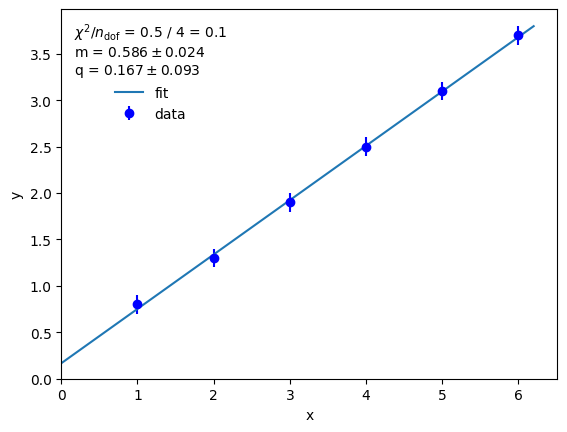

In [11]:
# draw data and fitted line
plt.errorbar(x,y,sy,fmt='bo',label='data')
plt.plot(np.linspace(0,6.2), line(np.linspace(0,6.2), *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False)
# draw origin of the axes
plt.xlim(left=0)
plt.ylim(bottom=0)
# axes labels
plt.xlabel('x')
plt.ylabel('y')